In [11]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
# Load data
data_path = '../data/clean_data.json'
with open(data_path, 'r') as f:
    df = pd.read_json(f)

In [13]:
df = df[df.genotype.isin((0,1,2))]
df['red'] = df.r_normalized
df['green'] = df.g_normalized
df['lgenotype'] = np.vectorize({0:'m', 1:'h', 2:'w'}.get)(df.genotype)

In [14]:
import seaborn as sns
from copy import deepcopy

In [15]:
window_size = 25
for exp_id in df.experiment.unique():
    exp = df[df.experiment==exp_id]
    for disc_id in exp.disc_id.unique():
        disc = exp[exp.disc_id==disc_id]
        
        cells = disc.sort_values('centroid_x')
        
        window = lambda x: x//window_size
        for lgenotype in 'mhw':
            current_genotype = cells[cells.lgenotype==lgenotype]
            df.loc[cells.index, 'concurrent_'+lgenotype] = cells.centroid_y.map(window).isin(current_genotype.centroid_y.map(window).unique())        

        
df['concurrent_all'] = df.concurrent_m&df.concurrent_h&df.concurrent_w
df = df[df.concurrent_all]

In [6]:
def boxplot(df, y='red'):
    colors = dict(m='r', h='g', w='b')
    plt.figure()
    order = ('control', 'perturbation')
    sns.boxplot(x='experiment', y=y, data=df, order=order, hue='lgenotype', notch=True)
    ax = plt.gca()
    ax.legend(loc=1)
    ax.grid(axis='y')


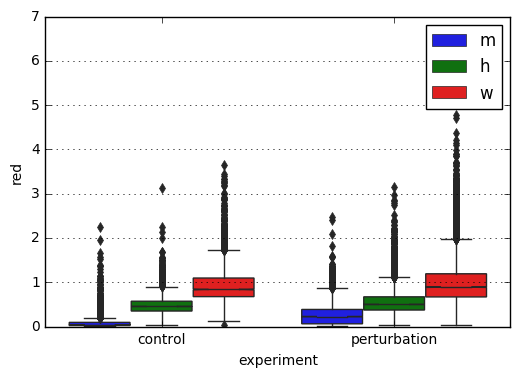

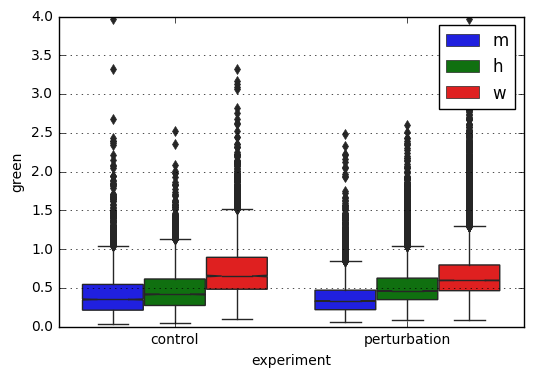

In [7]:
boxplot(df, 'red')
boxplot(df, 'green')

In [16]:
control = df[df.experiment=='control']
mutant = df[df.experiment=='perturbation']

In [89]:
from scipy.stats import pearsonr

cpearson, cr2 = pearsonr(control.red, control.green)

mpearson, mr2 = pearsonr(mutant.red, mutant.green)

print(cpearson, mpearson)

0.527053437677 0.63222241172


In [10]:
import scipy.stats as st

reg = st.linregress(control.red, control.green)

NameError: name 'control' is not defined

NameError: name 'gb' is not defined

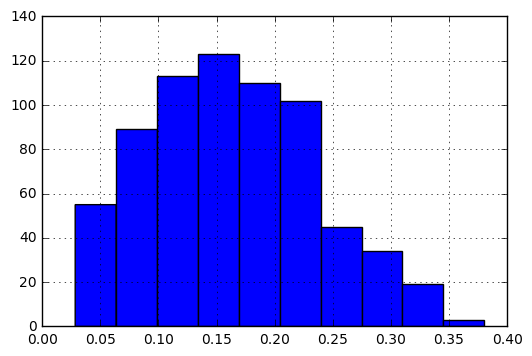

In [74]:
layer.g.hist()

In [119]:
m, b = fit_line(exp.r, exp.g)

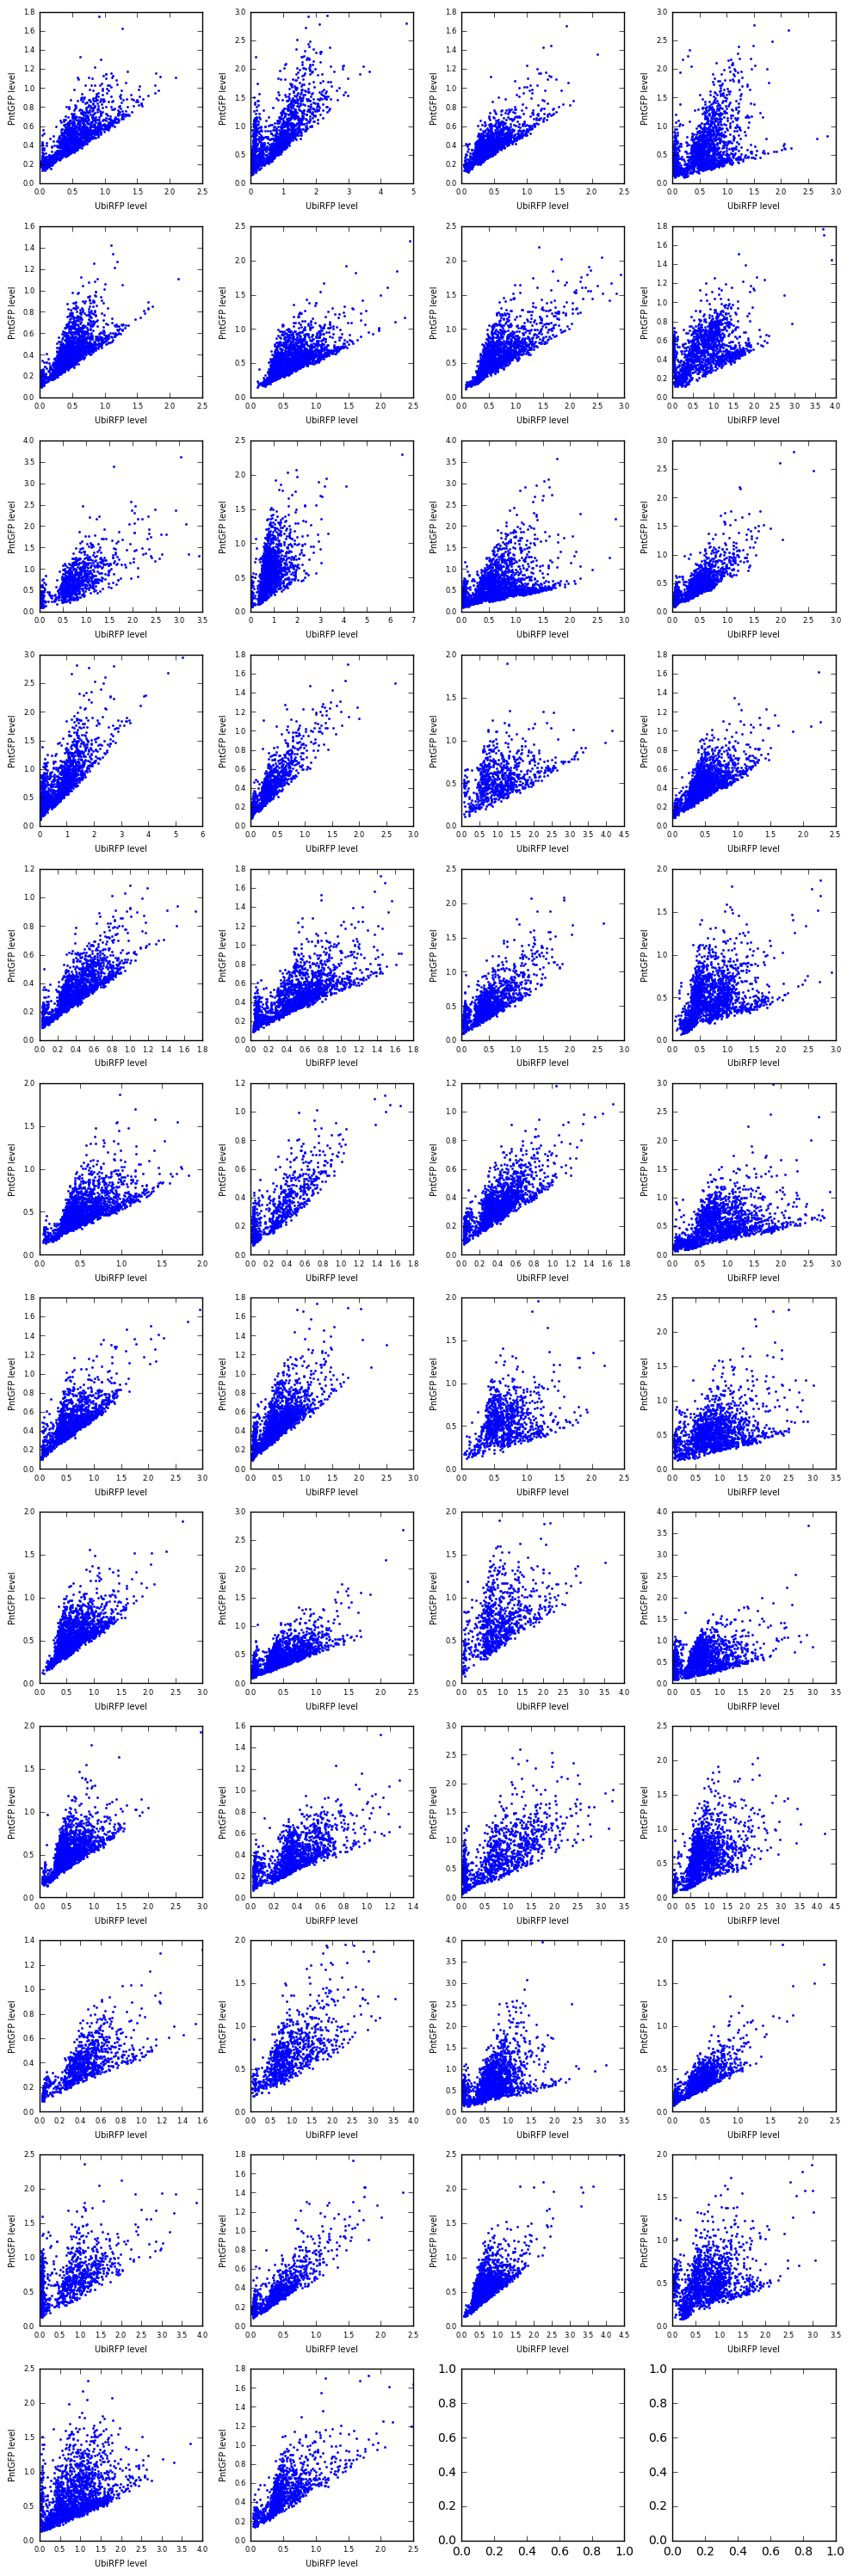

In [148]:
exp = mutant
xvar, yvar = 'red', 'green'

gb = exp.groupby(by=('disc_id', 'layer'))
nlayers = len(gb.indices)
nrows = (nlayers // 4)+1
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(10, nrows*2.5))
for i, ind in enumerate(gb.indices.values()):
    layer = exp.iloc[ind]
    
    #cells = layer[layer.green < np.percentile(layer.green, q=66) ]
    cells = layer
    
    ax = axes.ravel()[i]
    
    x, y = cells[xvar], cells[yvar]
    
    ax.plot(x, y, '.', markersize=3)
    
    
    ax.tick_params(labelsize=6)
    ax.set_xlabel('UbiRFP level', fontsize=7)
    ax.set_ylabel('PntGFP level', fontsize=7)
plt.tight_layout()

In [116]:
from scipy.stats import linregress

def linear_detrending(x, y):
    reg = linregress(x, y)
    m, b = reg.slope, reg.intercept
    yhat = (m*x+b)
    return (y-yhat)/yhat

def fit_line(x, y):
    reg = linregress(x, y)
    m, b = reg.slope, reg.intercept
    return m, b


def rescale(x, y):
    m, b = fit_line(x, y)
    return y / (m*x+b)

In [145]:
m, b = fit_line(control.r, control.g)
control['g_rescaled'] = control.g.values / (control.r.values*m + b)
mutant['g_rescaled'] = mutant.g.values / (mutant.r.values*m + b)

m, b = fit_line(control.red, control.green)
control['green_rescaled'] = control.green.values / (control.red.values*m + b)
mutant['green_rescaled'] = mutant.green.values / (mutant.red.values*m + b)
df = pd.concat((control, mutant))

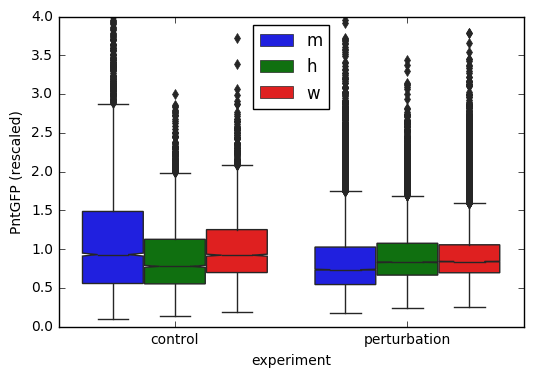

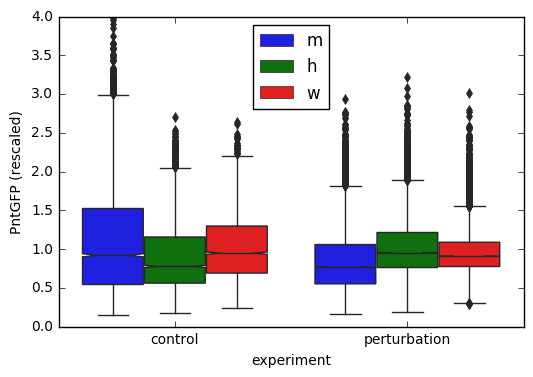

In [146]:
fig = plt.figure()
sns.boxplot(x='experiment', y='green_rescaled', data=df, hue='lgenotype', notch=True)
ax = fig.axes[0]
ax.set_ylim(0, 4)
ax.set_ylabel('PntGFP (rescaled)')
ax.legend(loc=9)

fig = plt.figure()
sns.boxplot(x='experiment', y='g_rescaled', data=df, hue='lgenotype', notch=True)
ax = fig.axes[0]
ax.set_ylim(0, 4)
ax.set_ylabel('PntGFP (rescaled)')
ax.legend(loc=9)

/Users/Sebi/Documents/grad_school/research/pnt_expression/FlyEye_Suite/venv/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


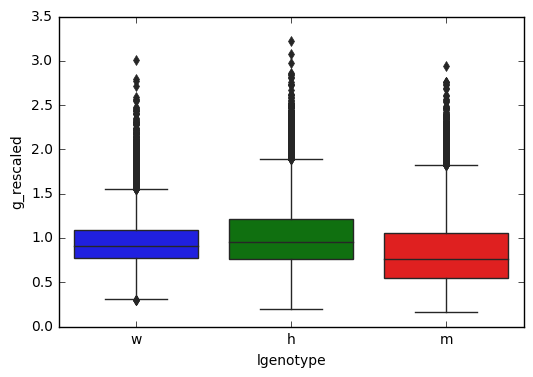

In [128]:
sns.boxplot(x='lgenotype', y='g_rescaled', data=mutant)

In [105]:

gb = exp.groupby(by=('disc_id', 'layer'))
for i, ind in enumerate(gb.indices.values()):
    layer = exp.iloc[ind]
    print(layer.disc_id.unique(), layer.layer.unique())
    break

[55] [4]


In [107]:
layer.disc_id.unique()

array([55])

In [108]:
layer.layer.unique()

array([4])

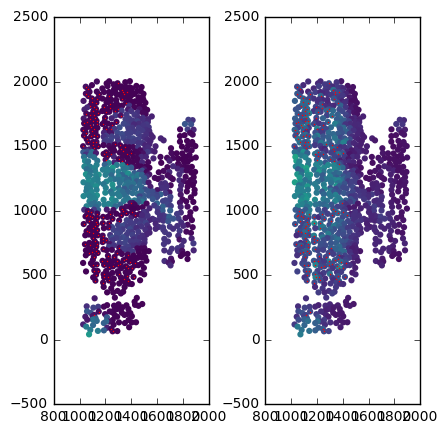

In [115]:
ind = list(gb.indices.values())[0]
layer = exp.iloc[ind]
xy = layer[['centroid_y', 'centroid_x']].values

fig, axes = plt.subplots(ncols=2, figsize=(5, 5))
ax0, ax1 = axes
ax0.scatter(*xy.T, c=layer.r, linewidth=0, cmap=plt.cm.viridis, vmin=0, vmax=1)
ax0.set_aspect(1)
ax1.scatter(*xy.T, c=layer.g, linewidth=0, cmap=plt.cm.viridis, vmin=0, vmax=1)
ax1.set_aspect(1)

cells = layer[layer.r<.05]
cells = cells[cells.g>0.2]
xy = cells[['centroid_y', 'centroid_x']].values
ax0.scatter(*xy.T, c='r', linewidth=0, s=1)
ax0.set_aspect(1)
ax1.scatter(*xy.T, c='r', linewidth=0, s=1)
ax1.set_aspect(1)



#plt.figure()
#plt.plot(layer.r, layer.g, '.')

(0, 1)

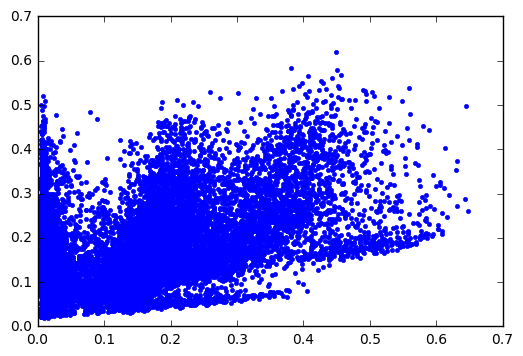

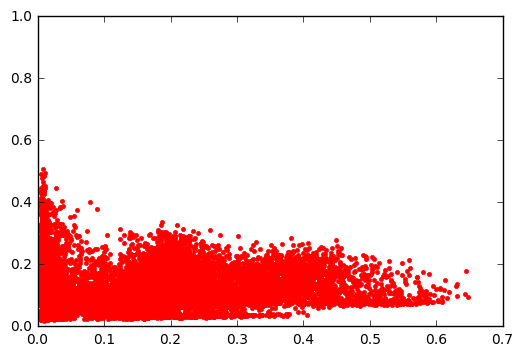

In [70]:
x, y = control.r, control.g

fig, ax = plt.subplots()
ax.plot(x, y, '.')

fig, ax = plt.subplots()
m, b = fit_line(x, y)
y_fit = y * (b / (m*x+b))
ax.plot(x, y_fit, '.r')
ax.set_ylim(0, 1)

In [82]:
cells

,b,b_std,centroid_x,centroid_y,disc_genotype,disc_id,experiment,foreground,g,g_normalized,...,region,selected,used,red,green,lgenotype,concurrent_m,concurrent_h,concurrent_w,concurrent_all
28711,0.462315,0.230185,956.789109,1852.631683,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,55,control,True,0.043517,0.094128,...,r,True,True,0.026416,0.094128,m,True,True,True,True
28712,0.303562,0.082585,953.696763,1672.919932,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,55,control,True,0.118346,0.389858,...,r,True,True,0.677484,0.389858,w,True,True,True,True
28716,0.266100,0.058356,953.886447,1693.369963,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,55,control,True,0.182816,0.687019,...,r,True,True,1.139238,0.687019,w,True,True,True,True
28717,0.480754,0.143681,952.138070,1181.463316,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,55,control,True,0.235728,0.490330,...,r,True,True,0.016620,0.490330,m,True,True,True,True
28719,0.414066,0.108567,950.957929,1214.381877,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,55,control,True,0.130109,0.314223,...,r,True,True,0.018433,0.314223,m,True,True,True,True
28723,0.413738,0.146360,949.075426,1476.656934,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,55,control,True,0.189836,0.458832,...,r,True,True,0.380286,0.458832,h,True,True,True,True
28724,0.379784,0.193355,950.398195,1399.826479,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,55,control,True,0.222401,0.585600,...,r,True,True,0.256841,0.585600,m,True,True,True,True
28725,0.556596,0.183937,949.593385,1096.237354,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,55,control,True,0.225559,0.405247,...,r,True,True,0.013604,0.405247,m,True,True,True,True
28727,0.525779,0.201099,946.239737,1135.044335,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,55,control,True,0.261063,0.496527,...,r,True,True,0.015888,0.496527,m,True,True,True,True
28731,0.409337,0.280268,943.159763,1819.879684,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,55,control,True,0.054267,0.132572,...,r,True,True,0.064907,0.132572,m,True,True,True,True


In [40]:
gtrend = control.groupby('lgenotype').green.mean()
#gtrend/gtrend.min()
gtrend

lgenotype
h    0.473311
m    0.412575
w    0.728750
Name: green, dtype: float64

In [41]:
df_detrended = deepcopy(df)

In [42]:
df_detrended

,b,b_std,centroid_x,centroid_y,disc_genotype,disc_id,experiment,foreground,g,g_normalized,...,region,selected,used,red,green,lgenotype,concurrent_m,concurrent_h,concurrent_w,concurrent_all
10,0.288547,0.145374,960.433099,309.262324,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,29,control,True,0.113379,0.392932,...,a,True,True,0.039472,0.392932,m,True,True,True,True
100,0.407246,0.204759,894.130298,753.599686,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,29,control,True,0.061302,0.150528,...,a,True,True,0.043465,0.150528,m,True,True,True,True
1000,0.428106,0.141762,105.554810,1058.076063,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,29,control,True,0.125570,0.293315,...,a,True,True,0.078070,0.293315,m,True,True,True,True
10000,0.347201,0.190361,1981.125786,1208.731656,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,30,control,True,0.198601,0.572005,...,r,True,True,0.557122,0.572005,h,True,True,True,True
10001,0.535407,0.179393,1980.560392,1185.340588,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,30,control,True,0.251736,0.470177,...,r,True,True,0.393254,0.470177,h,True,True,True,True
10003,0.492990,0.234436,1977.929870,1304.194805,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,30,control,True,0.108178,0.219433,...,r,True,True,0.270166,0.219433,m,True,True,True,True
10004,0.348401,0.095000,1982.983051,1289.400000,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,30,control,True,0.166918,0.479096,...,r,True,True,0.482384,0.479096,h,True,True,True,True
10005,0.364864,0.107229,1975.354305,1120.543046,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,30,control,True,0.128512,0.352218,...,r,True,True,0.689177,0.352218,w,True,True,True,True
10011,0.496368,0.227340,1971.915254,1412.919322,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,30,control,True,0.053227,0.107232,...,r,True,True,0.031286,0.107232,m,True,True,True,True
10017,0.357436,0.121569,1964.368497,1234.514451,w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A,30,control,True,0.393666,1.101360,...,r,True,True,0.692691,1.101360,h,True,True,True,True


In [30]:
f = np.log2((control.green / control.red))
correction = f.mean()

In [32]:
2**correction

1.8922073351476434

In [37]:
len(control)

16892

In [38]:
len(mutants)

86442

In [126]:
df.experiment.unique()

array(['control', 'perturbation'], dtype=object)

In [127]:
control = df[df.experiment=='control']
mutant = df[df.experiment=='perturbation']

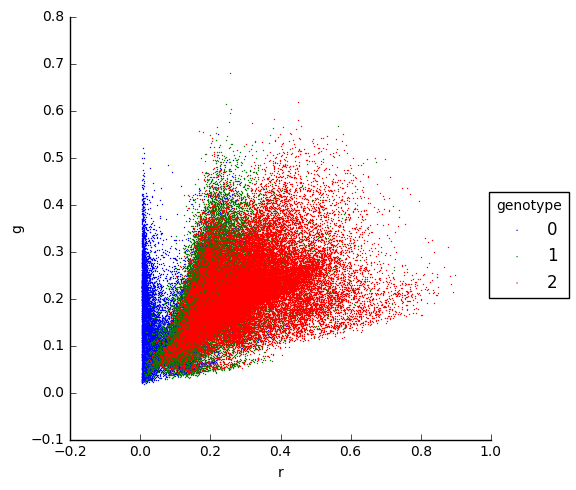

In [113]:
sns.pairplot(df, x_vars='r', y_vars='g', hue='genotype', plot_kws=dict(s=1, linewidth=0), size=5)

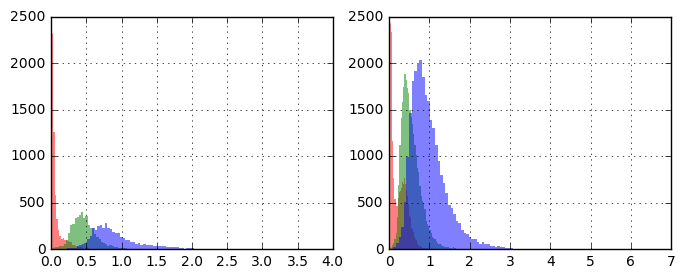

In [129]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))
for g in (0, 1, 2):
    d = control[control.genotype==g]
    _ = d.red.hist(bins=100, ax=ax0, alpha=.5, linewidth=0, color='rgb'[g])
    
    dm = mutant[mutant.genotype==g]
    _ = dm.red.hist(bins=100, ax=ax1, alpha=.5, linewidth=0, color='rgb'[g])

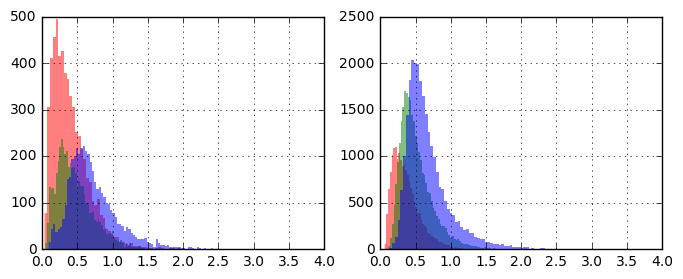

In [130]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))
for g in (0, 1, 2):
    d = control[control.genotype==g]
    _ = d.green.hist(bins=100, ax=ax0, alpha=.5, linewidth=0, color='rgb'[g])
    
    dm = mutant[mutant.genotype==g]
    _ = dm.green.hist(bins=100, ax=ax1, alpha=.5, linewidth=0, color='rgb'[g])

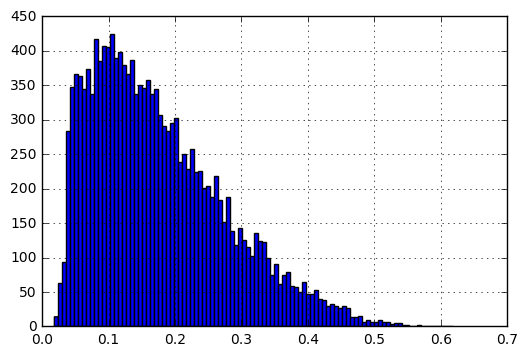

In [99]:
_ = control.g.hist(bins=100)

In [14]:
control = df[df.experiment=='control']
mutants = df[df.experiment=='perturbation']

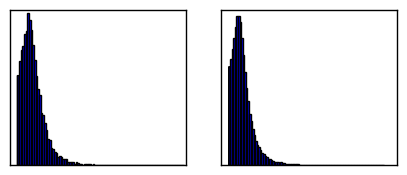

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(5, 2))
(ax0, ax1) = axes
control.pixel_count.hist(ax=ax0, bins=100, normed=True)
mutants.pixel_count.hist(ax=ax1, bins=100, normed=True)
for ax in axes:
    ax.set_yticks([])
    ax.set_xticks([])

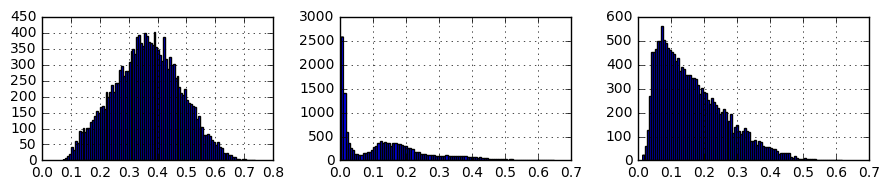

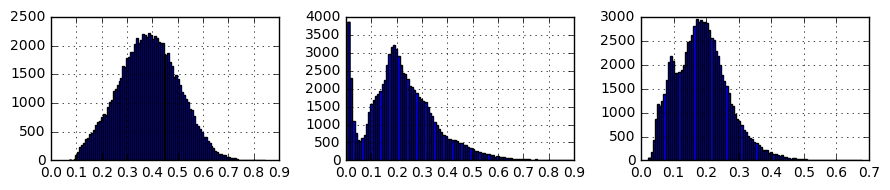

In [16]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 2))
control.b.hist(ax=ax0, bins=100)
control.r.hist(ax=ax1, bins=100)
control.g.hist(ax=ax2, bins=100)
plt.tight_layout()

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 2))
mutants.b.hist(ax=ax0, bins=100)
mutants.r.hist(ax=ax1, bins=100)
mutants.g.hist(ax=ax2, bins=100)
plt.tight_layout()

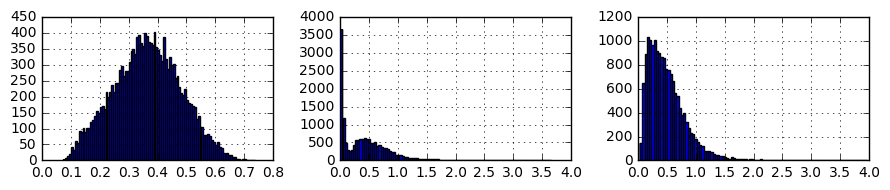

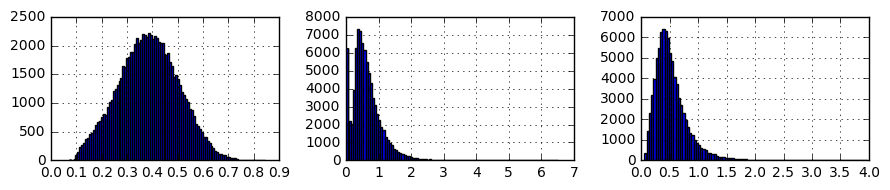

In [18]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 2))
control.b.hist(ax=ax0, bins=100)
control.r_normalized.hist(ax=ax1, bins=100)
control.g_normalized.hist(ax=ax2, bins=100)
plt.tight_layout()

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(9, 2))
mutants.b.hist(ax=ax0, bins=100)
mutants.r_normalized.hist(ax=ax1, bins=100)
mutants.g_normalized.hist(ax=ax2, bins=100)
plt.tight_layout()

In [10]:
df.columns.unique()

Index(['b', 'b_std', 'centroid_x', 'centroid_y', 'disc_genotype', 'disc_id',
       'experiment', 'foreground', 'g', 'g_normalized', 'g_std', 'genotype',
       'id', 'include', 'layer', 'pixel_count', 'r', 'r_normalized', 'r_std',
       'region', 'selected', 'used', 'red', 'green', 'lgenotype',
       'concurrent_m', 'concurrent_h', 'concurrent_w', 'concurrent_all'],
      dtype='object')

In [22]:
disc = df[df.disc_id==29]
layer = disc[disc.layer==0]

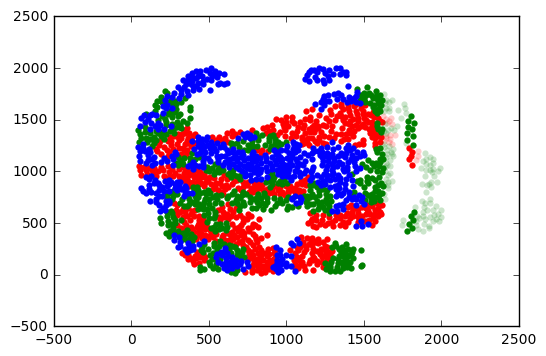

In [23]:
fig, ax = plt.subplots()
for i, genotype in enumerate('mhw'):
    cells = layer[layer.lgenotype==genotype]
    xy = cells[['centroid_y', 'centroid_x']].values
    ax.scatter(*xy.T, c='rgb'[i], alpha=0.2, linewidths=0)
    
    concurrent = cells[cells.concurrent_all]
    xy = concurrent[['centroid_y', 'centroid_x']].values
    ax.scatter(*xy.T, c='rgb'[i], alpha=1, linewidths=0)
    

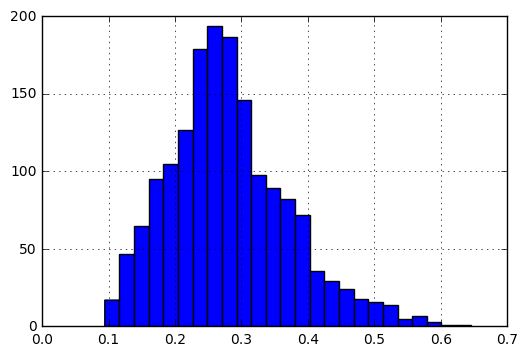

In [10]:
disc = df[df.disc_id==29]
layer = disc[disc.layer==0]
_ = layer.b.hist(bins=25)

In [ ]:
fig, ax = plt.subplots()

xy = control[['centroid_y', 'centroid_x']].values
ax.scatter(*xy.T, c=control.red, linewidth=0, s=1)

from scipy.interpolate import rbf

rbf_fit = rbf.Rbf(xy.T[0], xy.T[1], control.red.values)

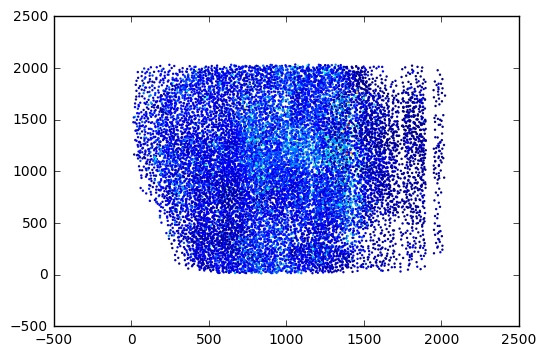

In [100]:
fig, ax = plt.subplots()

xy = control[['centroid_y', 'centroid_x']].values
ax.scatter(*xy.T, c=control.green, linewidth=0, s=3)

In [99]:
len(control.groupby(('disc_id', 'layer')).indices)

14